2024-03-08 20:03:39.513 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.276096)
2024-03-08 20:03:41.756 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted logistic distribution with error=0.120582)


          sumsquare_error           aic           bic  kl_div  ks_statistic  \
logistic         0.120582  13484.772652  13509.789968     inf      0.312738   
norm             0.276096  37962.339959  37987.357274     inf      0.346169   

          ks_pvalue  
logistic        0.0  
norm            0.0  


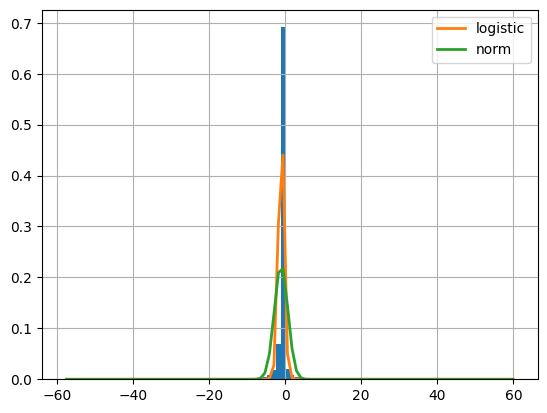

In [4]:
import numpy as np
from fitter import Fitter, get_common_distributions, get_distributions
from StandardBrownianMotion import StandardBrownianMotion
from BridgeBrownianMotion import BridgeBrownianMotion
from GeometricBrownianMotion import GeometricBrownianMotion
import matplotlib.pyplot as plt
import random


def distributional_properties(motion_a):
    mean = np.mean(motion_a, axis=0)
    variance = np.var(motion_a, axis=0)
    # covariance = np.cov(motion_a, motion_b)
    # correlation = np.corrcoef(motion_a, motion_b)
    return mean, variance  # , covariance, correlation


def plot_compare_theoric_real(
    t, real_values, theoric_values, compared_value, type_of_motion
):
    plt.plot(t, real_values, label=compared_value, color="blue", marker="o")
    plt.plot(
        t,
        theoric_values,
        label="Theoretical " + compared_value,
        color="red",
        marker="x",
    )

    plt.xlabel("Time")
    plt.ylabel("Mean")
    plt.title(
        f"Comparison of {compared_value} and Theoretical {compared_value} over Time for {type_of_motion}"
    )
    plt.legend()
    plt.grid(True)
    plt.show()


def see_distributions(motion):
    f = Fitter(motion, distributions=['norm', 'lognorm'])
    f.fit()
    f.summary()
    f.get_best()



def geometric():
    num_trayectories = 5000
    num_steps = 250  # Number of time steps
    alpha = 0.5
    lamda = 0.5

    geometric_brownian_motion = GeometricBrownianMotion(
        num_trayectories, num_steps, max_time=1, alpha=0.5, lamda=0.5
    )
    geometric_brownian_motion.generate_geometric_brownian_motion()
    Bt_a = geometric_brownian_motion.geometric_brownian_motions
    t = geometric_brownian_motion.t
    dt = geometric_brownian_motion.dt

    mean, variance = distributional_properties(Bt_a)
    theoric_mean = np.exp(alpha * t)
    theoric_variance = np.exp(2 * (alpha * t)) * (
        np.exp((lamda**2) * t) - np.ones(len(t))
    )
    covar_t = []
    covar_r = []
    corr_t = []
    corr_r = []
    for i in range(15):
        t_rand = random.randrange(1, num_steps + 1) - 1
        s_rand = random.randrange(1, t_rand) - 1
        covarianza_gr = np.cov(Bt_a[:, t_rand], Bt_a[:, s_rand])
        covariance = covarianza_gr[0][1]
        correlation_gr = np.corrcoef(Bt_a[:, t_rand], Bt_a[:, s_rand])
        correlation = correlation_gr[0][1]
        theoric_covariance = np.exp(2 * alpha * ((s_rand * dt) + (t_rand * dt))) * (
            np.exp((t_rand * dt) * (lamda**2)) - 1
        )
        theoric_correlation = theoric_covariance / (
            np.sqrt(theoric_variance[t_rand] * theoric_variance[s_rand])
        )
        covar_t.append(theoric_covariance)
        covar_r.append(covariance)
        corr_t.append(theoric_correlation)
        corr_r.append(correlation)


    f = Fitter(Bt_a, distributions=['lognorm', 'logistic'])
    f.fit()
    print(f.summary())

    # plot_compare_theoric_real(
    #     t, mean, theoric_mean, "Mean", "Geometric brownian motion"
    # )
    # plot_compare_theoric_real(
    #     t, variance, theoric_variance, "Variance", "Geometric brownian motion"
    # )

    # print("For the geometric brownian motion:")
    # print(f"The covariance is: {np.mean(np.array(covar_r))}")
    # print(f"The theoric covariance is: {np.mean(np.array(covar_t))}")
    # print(f"The correlation is: {np.mean(np.array(corr_r))}")
    # print(f"The theoric correlation is: {np.mean(np.array(corr_t))} \n")


def bridge():
    num_trayectories = 5000
    num_steps = 200

    bridge_brownian_motion = BridgeBrownianMotion(
        num_trayectories, num_steps, max_time=1
    )
    bridge_brownian_motion.generate_bridge_brownian_motion()
    Bt_a = bridge_brownian_motion.bridge_brownian_motions
    bridge_brownian_motion = BridgeBrownianMotion(
        num_trayectories, num_steps, max_time=1
    )
    t = bridge_brownian_motion.t
    t_rand = random.randrange(1, num_steps + 1) - 1
    s_rand = random.randrange(1, t_rand) - 1
    dt = bridge_brownian_motion.dt

    mean, variance = distributional_properties(Bt_a)
    covarianza_br = np.cov(Bt_a[:, t_rand], Bt_a[:, s_rand])
    covariance = covarianza_br[0][1]
    correlation_br = np.cov(Bt_a[:, t_rand], Bt_a[:, s_rand])
    correlation = correlation_br[0][1]
    theoric_mean = 0 * t
    theoric_variance = (t) * (np.ones(len(t)) - (t))
    theoric_covariance = (s_rand * dt) - (((s_rand * dt) * (t_rand * dt)))
    theoric_correlation = theoric_covariance / (
        np.sqrt(theoric_variance[t_rand] * theoric_variance[s_rand])
    )


    f = Fitter(Bt_a, distributions=['norm', 'logistic'])
    f.fit()
    print(f.summary())

    # plot_compare_theoric_real(t, mean, theoric_mean, "Mean", "Bridge brownian motion")
    # plot_compare_theoric_real(
    #     t, variance, theoric_variance, "Variance", "Bridge brownian motion"
    # )

    # print("For the bridge brownian motion:")
    # print(f"The covariance is: {covariance}")
    # print(f"The theoric covariance is: {theoric_covariance}")
    # print(f"The correlation is: {correlation}")
    # print(f"The theoric correlation is: {theoric_correlation} \n")


def brown_modification():
    num_trayectories = 10000
    num_steps = 200
    sigma = 0.4

    brownian_motion = StandardBrownianMotion(num_trayectories, num_steps)
    brownian_motion.generate_brownian_motion()
    Bt = brownian_motion.brownian_motions
    Bt_a = Bt**3 - np.exp(sigma * Bt)
    t = brownian_motion.t
    t_rand = random.randrange(1, num_steps + 1) - 1
    s_rand = random.randrange(1, t_rand) - 1
    dt = brownian_motion.dt

    mean, variance = distributional_properties(Bt_a)
    theoric_mean = -np.exp(sigma**2 * t / 2)
    theoric_variance = (
        (15 * t**3)
        - (6 * np.exp(((sigma**2) * t) / 2) * t**2 * sigma)
        - (2 * np.exp(((sigma**2) * t) / 2) * t**3 * sigma**3)
        + (np.exp(2 * (sigma**2) * t))
        - np.exp((sigma**2) * t)
    )


    f = Fitter(Bt_a, distributions=['norm', 'logistic'])
    f.fit()
    print(f.summary())
    
    # plot_compare_theoric_real(t, mean, theoric_mean, "Mean", "Brownian modification")
    # plot_compare_theoric_real(
    #     t, variance, theoric_variance, "Variance", "Brownian modification"
    # )

    # print("For the bridge brownian motion:")
    # print(f"The covariance is: {covariance}")
    # print(f"The theoric covariance is: {theoric_covariance}")
    # print(f"The correlation is: {correlation}")
    # print(f"The theoric correlation is: {theoric_correlation} \n")


def main():
    # geometric()
    # bridge()
    brown_modification()

main()
